# Social Network Segmentation Analysis

In this exercise, we will try to identify different groups of teenagers based on their personal preferences using an unsupervised learning model.  
  
Start by importing your libraries, loading the dataset and exploring its variables.  
What features do you find? Do they have the correct datatypes?

In [102]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [103]:
data=pd.read_csv('snsdata.csv')

In [104]:
data.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [105]:
data.keys()

Index(['gradyear', 'gender', 'age', 'friends', 'basketball', 'football',
       'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
       'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
       'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
       'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
       'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs'],
      dtype='object')

In [106]:
data.shape

(30000, 40)

In [107]:
data.dtypes

gradyear          int64
gender           object
age             float64
friends           int64
basketball        int64
football          int64
soccer            int64
softball          int64
volleyball        int64
swimming          int64
cheerleading      int64
baseball          int64
tennis            int64
sports            int64
cute              int64
sex               int64
sexy              int64
hot               int64
kissed            int64
dance             int64
band              int64
marching          int64
music             int64
rock              int64
god               int64
church            int64
jesus             int64
bible             int64
hair              int64
dress             int64
blonde            int64
mall              int64
shopping          int64
clothes           int64
hollister         int64
abercrombie       int64
die               int64
death             int64
drunk             int64
drugs             int64
dtype: object

## 1. Data Wrangling

If you found in the last step that there are variables that need to be dealt with before we can start our analysis, please do it. Comment your code and take us through the steps of your thinking.  

Consider the some of these aspects:  
* Wrong data types
* Null values
* Consistency in categorical data

In [108]:
data.isnull().sum()

gradyear           0
gender          2724
age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

In [109]:
#ALGUNOS DE LOS DATOS NULOS EN GENDER SON LOS MISMO QUE EN AGE, POR LO TANTO EL NUMERO DE ROWS PERDIDOS SE REDUCE 
data[data['gender'].isnull()==True][data['age'].isnull()==True]

/var/folders/ww/y02x51013l19p_m1qw45mrlc0000gn/T/ipykernel_802/1591900636.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['gender'].isnull()==True][data['age'].isnull()==True]


,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
13,2006,NaN,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,2006,NaN,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,2006,NaN,NaN,135,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41,2006,NaN,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,2006,NaN,NaN,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29893,2009,NaN,NaN,3,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
29905,2009,NaN,NaN,45,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
29928,2009,NaN,NaN,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29931,2009,NaN,NaN,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Los datos faltantes de las dos columnas son menos del 50%, entonces solo eliminamos los nans

In [110]:
(2724*100)/30000

9.08

In [111]:
(5084*100)/30000

16.946666666666665

In [112]:
data.shape

(30000, 40)

In [113]:
len(data[data['age']>100])

163

In [114]:
#El data set es de teenagers pero las edades van desde los 3 a más de 100, así podemos eliminar esta variable
data1 = data.drop(columns=["age"])

In [115]:
data['gradyear'].unique()

array([2006, 2007, 2008, 2009])

In [116]:
data['gender'].unique()

array(['M', 'F', nan], dtype=object)

In [117]:
#Vamos a tomar los Nans de gender como personas no binarias
data1["gender"] = data1["gender"].fillna("no binario")

In [118]:
#pero para poder agruparlos los volvemos int
data1['gender']=np.where(data1['gender']=='M',0,(np.where(data1['gender']=='F',1,2)))
data1.head()

,gradyear,gender,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,0,69,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,2,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


## 2. Data Visualization

Now that the data is more or less fixed, plot some charts to understand better how it is composed:  
* Check distribution of variables - do we have outliers? What should we do with them?
* Understand which features are correlated - do they represent the same? Which ones should we keep?
* When we compare two variables, is it possible to see groups in the data?
* Given the dimension of the dataset, would it be useful to perform dimension reduction in some variables? Which ones would you group?

Comment your ideas based on the visualizations you made and other data exploration. What will be your next steps before modeling?

In [119]:
corr=data1.corr()

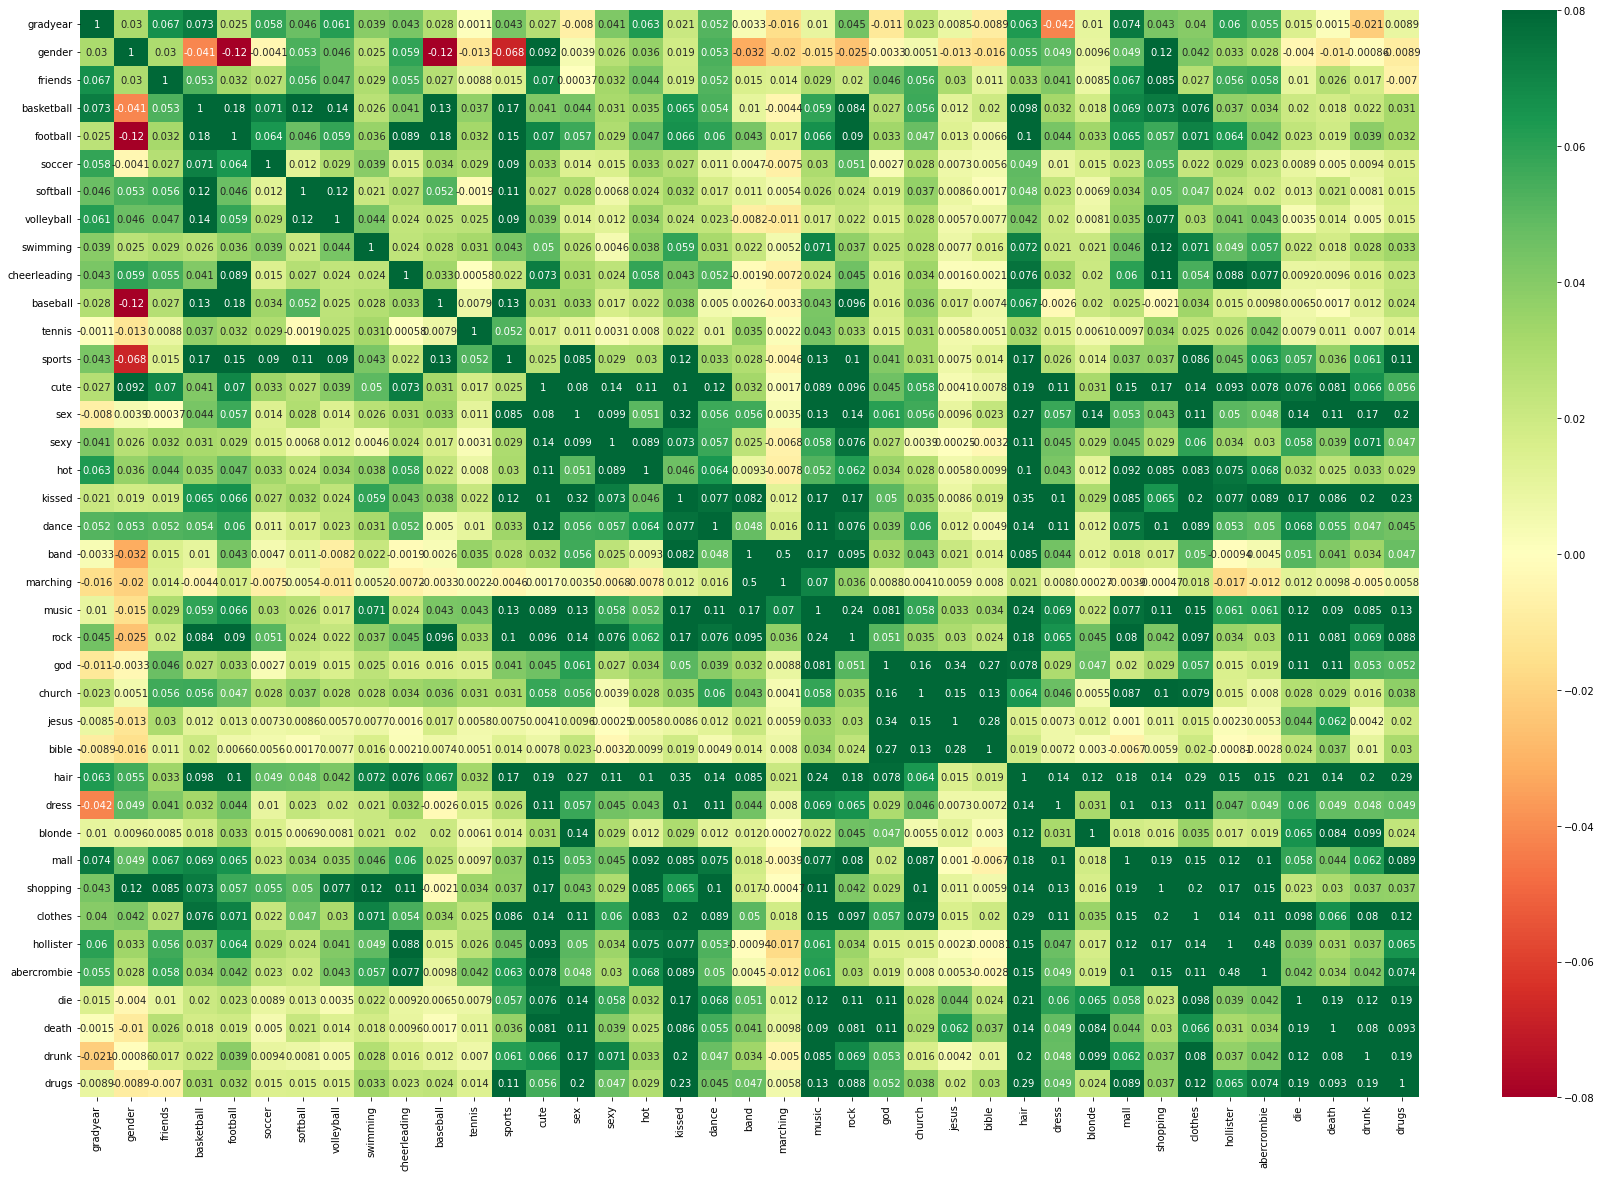

In [120]:
#Las correlaciones no son tan altas
plt.subplots(figsize=(30,20))
sns.heatmap(corr,cmap= 'RdYlGn',vmin=-.08, vmax=.08,annot=True)
plt.show()

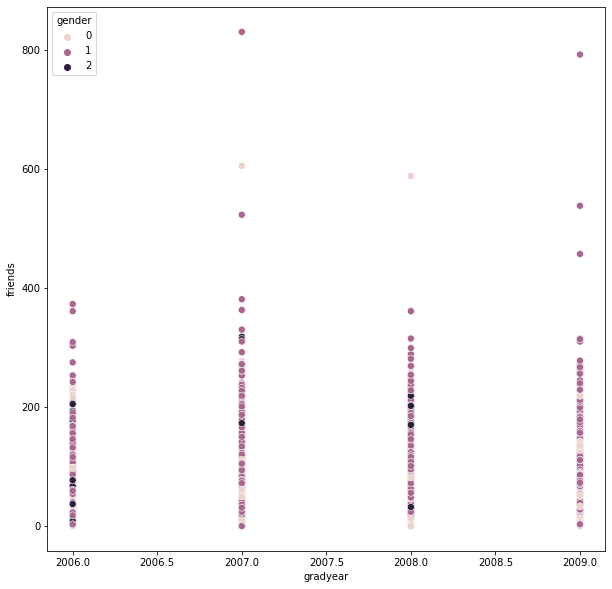

In [121]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=data1, x="gradyear", y="friends", hue="gender", s = 50)
plt.show()

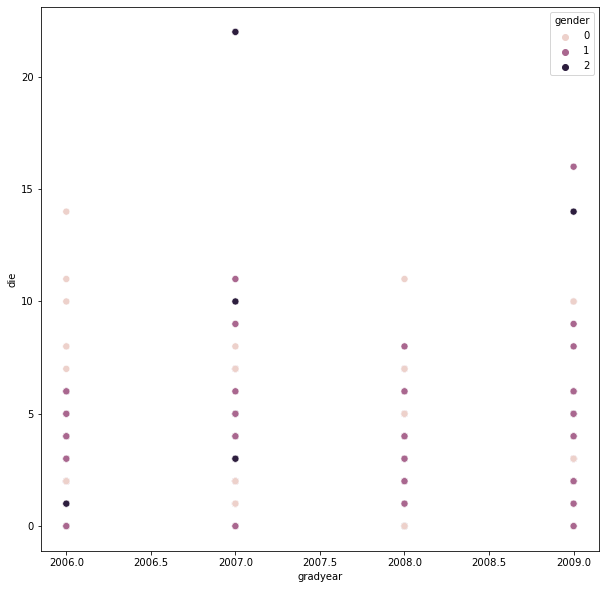

In [21]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=data1, x="gradyear", y="die", hue="gender", s = 50)
plt.show()

In [122]:
data1[data1['gradyear']==2007]['die'].max()

22

In [123]:
data1['friends'].max()

830

In [124]:
#tenemos muchas variables hacer una reduccion de dimensiones podria ayudar 
data1.shape


(30000, 39)

## 3. Feature Engineering

Based on your previous conclusions, perform transformations in your features. Think about:  
* Category Encoding
* Outliers & Standardization
* Dimension Reduction
* Discard features that are less relevant to group the data

Why did you choose each method? Please explain your rationale.

In [126]:
#Hay outliers en la cantidad de amigos. 
# y como no todos son amigos, vamos a eliminar esta columna 
data1 = data1.drop(columns=["friends"],axis=1)

In [127]:
#Eliminando algunas variables irrelevantes 
data1 = data1.drop(columns=["jesus","bible","die"],axis=1)

In [128]:
data1.keys()

Index(['gradyear', 'gender', 'basketball', 'football', 'soccer', 'softball',
       'volleyball', 'swimming', 'cheerleading', 'baseball', 'tennis',
       'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed', 'dance', 'band',
       'marching', 'music', 'rock', 'god', 'church', 'hair', 'dress', 'blonde',
       'mall', 'shopping', 'clothes', 'hollister', 'abercrombie', 'death',
       'drunk', 'drugs'],
      dtype='object')

In [129]:
#Quitando los outliers
for col in data1.select_dtypes('number').columns:
    q25 = np.quantile(data1[col], 0.25)
    q75 = np.quantile(data1[col], 0.75)
    IQR = q75 - q25
    mask = (data1[col] > (q75 + 3 * IQR)) | (data1[col] < (q25 - 3 * IQR))
    data_iqr = data1[mask]
data_iqr

,gradyear,gender,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,...,dress,blonde,mall,shopping,clothes,hollister,abercrombie,death,drunk,drugs
4,2006,2,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,1,1
57,2006,0,0,0,0,0,0,0,0,1,...,0,0,2,1,1,0,0,0,0,2
67,2006,1,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
102,2006,1,1,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,1,0,1
115,2006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29839,2009,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29861,2009,1,1,0,0,1,1,0,5,0,...,0,0,0,4,0,1,1,0,2,1
29922,2009,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29966,2009,1,1,0,0,3,2,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [130]:
data_iqr.gender.value_counts()


1    1044
0     183
2      74
Name: gender, dtype: int64

In [131]:
data_iqr.gradyear.value_counts()

2008    362
2009    336
2007    312
2006    291
Name: gradyear, dtype: int64

In [133]:
#Vamos a crear una dummy de gradyear
data_dummie = pd.get_dummies(data=data_iqr, columns=['gradyear'])


In [134]:
data_dummie

,gender,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,...,clothes,hollister,abercrombie,death,drunk,drugs,gradyear_2006,gradyear_2007,gradyear_2008,gradyear_2009
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
57,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,2,1,0,0,0
67,1,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
102,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
115,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29839,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
29861,1,1,0,0,1,1,0,5,0,0,...,0,1,1,0,2,1,0,0,0,1
29922,1,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
29966,1,1,0,0,3,2,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1


In [83]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#scaler.fit(data_iqr)

#data_scale = scaler.transform(data_iqr)

In [ ]:
#census_scaler = StandardScaler()
#census_scaler.fit(tb_census[cluster_vars])


In [135]:
#Como tenemos muchas variables vamos a hacer un PCA con 6 componentes 
from sklearn.decomposition import PCA

pca = PCA(n_components=4)

principalComponents = pca.fit_transform(data_dummie)
principalDf = pd.DataFrame(data = principalComponents,columns = ['pc1', 'pc2', 'pc3', 'pc4'])#,'pc5','pc6'])
principalDf.head()             


,pc1,pc2,pc3,pc4
0,0.604038,0.801397,1.520736,-0.407609
1,5.542199,-0.082489,-3.768260,1.882155
2,-1.843015,0.004867,1.575344,-0.990931
3,-0.834426,-1.006339,2.455354,-1.066180
4,-2.663808,-0.033634,0.311421,-0.302271


<function matplotlib.pyplot.show(close=None, block=None)>

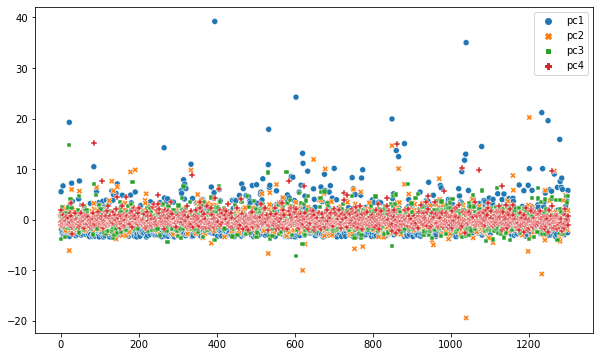

In [136]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=principalDf)#,x=data_pca['pc1'],y=data_pca['pc2'])
plt.show

## 4. Modeling

Now that your data is ready, apply one (or more) unsupervised learning model to find the groups of teens that exist:
* What model did you choose?
* What is the optimal number of clusters?
* Once your clusters are defined, how do you interpret them? - What type of teens there are? What are the differences between them?

In [137]:
#Aquí podemos hacer un k-means con un cluster por el número de año de graduación 
#2006, 2007, 2008, 2009

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
teen_clusters = kmeans.fit(principalDf)
teen_clusters.cluster_centers_



array([[-1.93851459e+00,  1.88708699e-01,  3.77523435e-01,
        -5.70924363e-03],
       [ 5.47963271e+00, -4.74336430e-01,  2.59141499e+00,
        -7.21287080e-02],
       [ 5.99634324e+00,  6.65501273e+00, -1.21267088e+00,
        -3.62035907e-01],
       [ 2.28234790e+01, -4.85656264e+00, -8.74582272e-01,
        -1.67402017e-01],
       [ 1.05755462e+00, -7.84905218e-01, -1.25393965e+00,
         6.99210588e-02]])

In [140]:
#Entonces ya con las etiquetas podemos incorporarlas al dataset original

data_iqr['labels'] = teen_clusters.fit_predict(principalDf)

In [143]:
data_iqr.labels.value_counts()

0    747
3    401
4    100
1     44
2      9
Name: labels, dtype: int64

In [144]:
pd.crosstab(data_iqr.gradyear,data_iqr.labels)

labels,0,1,2,3,4
gradyear,,,,,
2006,192,11,1,76,11
2007,188,8,2,83,31
2008,196,13,2,125,26
2009,171,12,4,117,32


In [145]:
data_iqr.head()

,gradyear,gender,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,...,blonde,mall,shopping,clothes,hollister,abercrombie,death,drunk,drugs,labels
4,2006,2,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,1,1,0
57,2006,0,0,0,0,0,0,0,0,1,...,0,2,1,1,0,0,0,0,2,3
67,2006,1,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
102,2006,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
115,2006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0


In [178]:
a = data_iqr.groupby(['labels'])[['gender','gradyear']].value_counts()
a.to_frame()

0
labels gender gradyear     
0      1      2008      158
              2006      143
              2007      140
              2009      131
       0      2006       36
              2007       35
              2008       31
              2009       25
       2      2009       15
              2007       13
              2006       13
              2008        7
1      1      2009       11
              2008       10
              2006       10
              2007        7
       0      2008        3
              2009        1
              2007        1
              2006        1
2      1      2009        4
              2007        2
              2008        2
              2006        1
3      1      2008      104
              2009       97
              2007       76
              2006       62
       0      2008       14
              2009       13
              2006       12
       2      2008        7
              2009        7
       0      2007        5
       2      2006        2
              2007        2
4      1      2007       27
              2009       27
              2008       23
              2006        9
       2      2009        4
       0      2007        2
       2      2007        2
       0      2008        2
              2006        1
       2      2006        1
              2008        1
       0      2009        1

In [190]:
sns.catplot(data = data_iqr, x = 'gradyear', y = 'labels', col= 'gender', kind = 'bar', col_wrapsns= 3)z)

SyntaxError: positional argument follows keyword argument (1006864082.py, line 1)

In [ ]:
sns.catplot(data = data_melt2, x = 'clu_ward', y = 'value', col= 'variable', kind = 'bar', col_wrap = 3)